In [ ]:
# Import Libraries Needed
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

!pip install wordcloud
!pip install -U spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from imblearn.under_sampling import RandomUnderSampler

In [ ]:
!pip install scikit-learn


In [ ]:
!head -n 10 fake_job_postings.csv

job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard F

In [ ]:
# Import the dataset
jobdata = pd.read_csv('fake_job_postings.csv')
jobdata.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
print("Data type : ", type(jobdata))
print("Data dims : ", jobdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17880, 18)


In [ ]:
print(jobdata.dtypes)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


In [ ]:
jobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Exploratory Data Analysis (EDA)

In [ ]:
# Create new variable 'country' in jobdata dataset by cutting out whatever comes after first comma

jobdata['country'] = jobdata['location'].str.split(',').str[0]
jobdata.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
jobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
jobdata.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11965
benefits                6203
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
country                   90
dtype: int64

After analysing and understanding all the variables from the dataset, these are the conclusion that we have drawn regarding the datatypes of each variable that needs to be changed:


#### Boolean
- telecommuting
- has_company_logo
- has_question
- fraudulent


#### Categorical
- location
- department
- employment_type
- required_experience
- required_education
- industry
- function
- country

In [ ]:
# Change column B and C's values to integers
jobdata = jobdata.astype({'telecommuting': bool,
                          'has_company_logo': bool,
                          'has_questions': bool,
                          'fraudulent': bool,
                          'location': 'category',
                          'department': 'category',
                          'employment_type': 'category',
                          'required_experience': 'category',
                          'required_education': 'category',
                          'industry': 'category',
                          'function': 'category',
                          'country': 'category'})

In [ ]:
jobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   job_id               17880 non-null  int64   
 1   title                17880 non-null  object  
 2   location             17534 non-null  category
 3   department           6333 non-null   category
 4   salary_range         2868 non-null   object  
 5   company_profile      14572 non-null  object  
 6   description          17879 non-null  object  
 7   requirements         15184 non-null  object  
 8   benefits             10668 non-null  object  
 9   telecommuting        17880 non-null  bool    
 10  has_company_logo     17880 non-null  bool    
 11  has_questions        17880 non-null  bool    
 12  employment_type      14409 non-null  category
 13  required_experience  10830 non-null  category
 14  required_education   9775 non-null   category
 15  industry           

In [ ]:
jobdata.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
country                  346
dtype: int64

Next, we felt that there are a few variables that could be dropped: (reasons provided)

- **job_id:** Removed because it is merely a label
- **department:** Many missing data, hence not a reliable variable to use to train model (64.58% missing data)
- **salary_range:** Many missing data, hence not a reliable variable to use to train model (83.96% missing data)
- **benefits:** Many missing data, hence not a reliable variable to use to train model (40.34% missing data).  In addition, we felt that it would not be too useful of a variable to use.

In [ ]:
jobdata = jobdata.drop(['job_id', 'department', 'salary_range', 'benefits'], axis=1)
jobdata.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,False,True,False,Other,Internship,NaN,NaN,Marketing,False,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,False,True,False,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,False,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,False,True,False,NaN,NaN,NaN,NaN,NaN,False,US
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",False,True,False,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,False,US
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,False,True,True,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,False,US


In [ ]:
jobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                17880 non-null  object  
 1   location             17534 non-null  category
 2   company_profile      14572 non-null  object  
 3   description          17879 non-null  object  
 4   requirements         15184 non-null  object  
 5   telecommuting        17880 non-null  bool    
 6   has_company_logo     17880 non-null  bool    
 7   has_questions        17880 non-null  bool    
 8   employment_type      14409 non-null  category
 9   required_experience  10830 non-null  category
 10  required_education   9775 non-null   category
 11  industry             12977 non-null  category
 12  function             11425 non-null  category
 13  fraudulent           17880 non-null  bool    
 14  country              17534 non-null  category
dtypes: bool(4), categor

### Fraudulent Count

<ipython-input-60-e152a3bab38c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='fraudulent', palette='rainbow')


fraudulent
False    17014
True       866
Name: count, dtype: int64

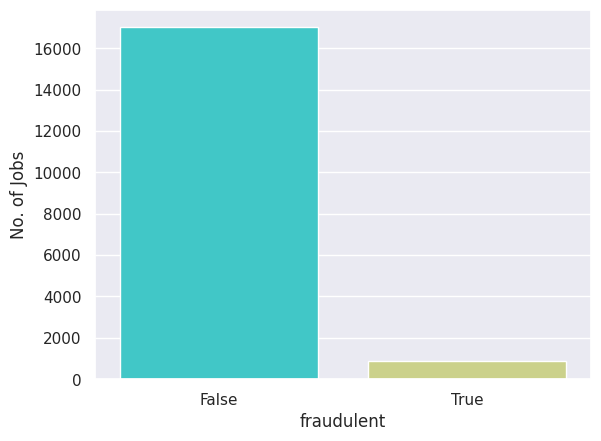

In [ ]:
ax = sb.countplot(data=jobdata, x='fraudulent', palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.fraudulent.value_counts()

This shows us that in the dataset, how many jobs are fraudulent as compared to jobs that are not fraudulent.

- **Not fraudulent:** 17014
- **Fraudulent:** 866

### Finding Correlation Between Boolean Data

In [ ]:
booldata = pd.DataFrame(jobdata[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']])
booldata.head()

,telecommuting,has_company_logo,has_questions,fraudulent
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,True,False


In [ ]:
# Correlation Matrix
booldata.corr()

,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.019836,1.000000,0.233932,-0.261971
has_questions,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.034523,-0.261971,-0.091627,1.000000


<Axes: >

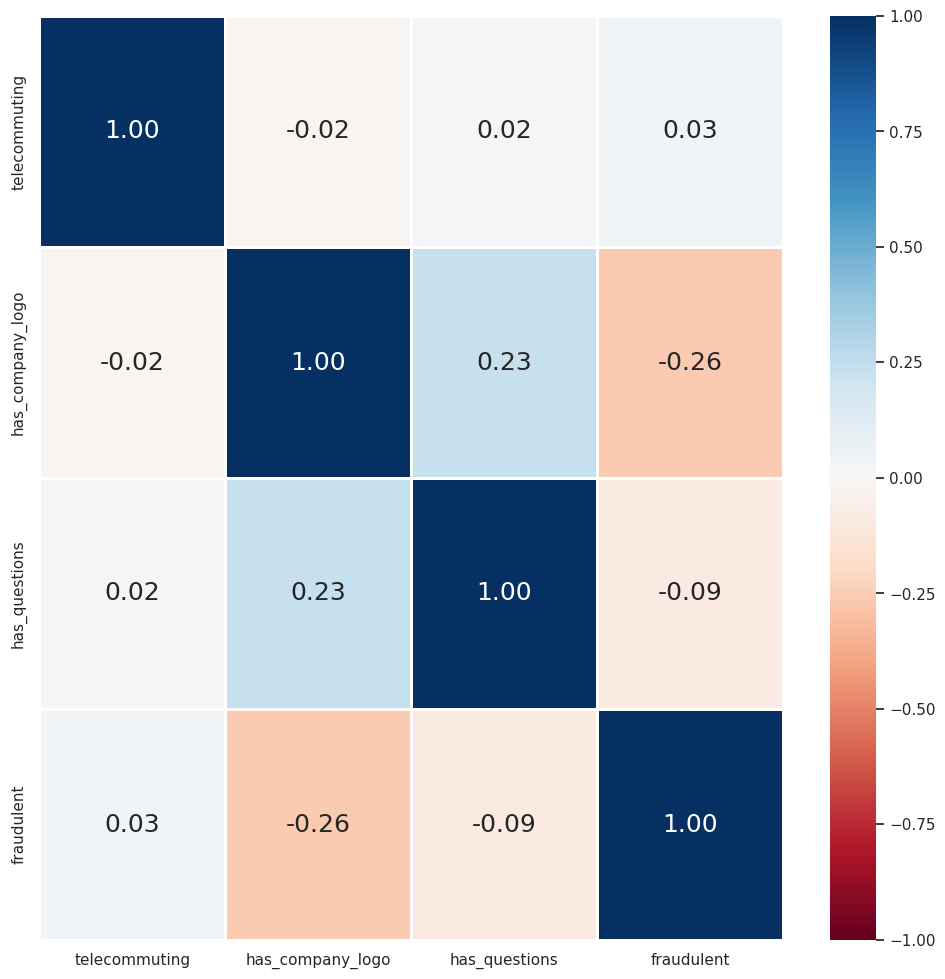

In [ ]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(booldata.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

We could not draw much conclusion from comparing the correlation between the boolean data in the dataset.
Next, we decided to assess the relationship of each variable with 'fraudulent'. This is to find out how each individual variable influence the likelihood of a job posting being fraudulent.

### telecommuting   VS   fraudulent

<ipython-input-64-ac9d7cc352e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='telecommuting', palette='rainbow')


telecommuting
False    17113
True       767
Name: count, dtype: int64

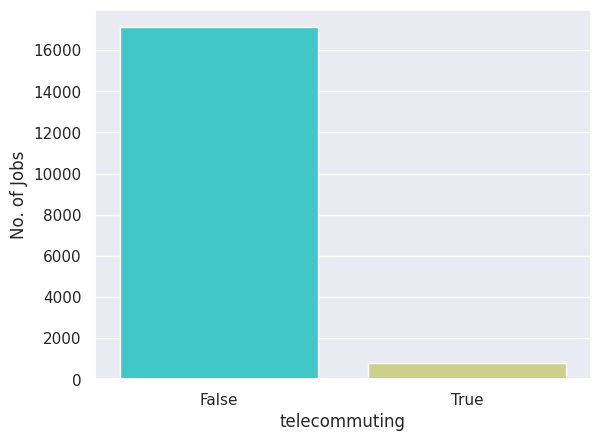

In [ ]:

ax = sb.countplot(data=jobdata, x='telecommuting', palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.telecommuting.value_counts()

This shows us that in the dataset, how many jobs allow for telecommuting as compared to jobs that do not allow for telecommuting.

- **Do Not Allow:** 17113
- **Allow:** 767

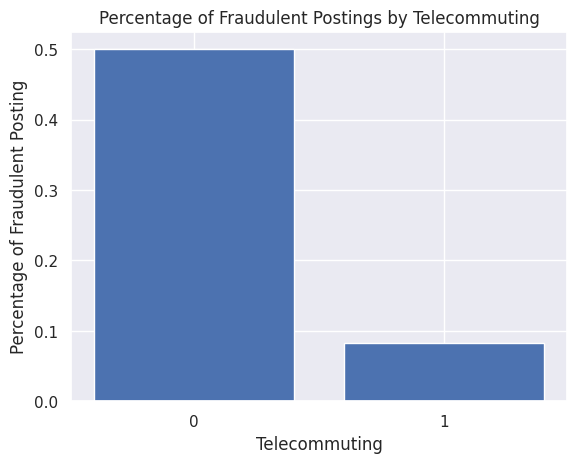

In [ ]:
# New dataframe that only consists of 'telecommuting' and 'fraudulent'
teleNfraud = pd.DataFrame(jobdata[['telecommuting', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})
# Identify the majority class
majority_class = 0

# Separate majority and minority classes
majority_class_data = teleNfraud[teleNfraud['telecommuting'] == majority_class]
minority_class_data = teleNfraud[teleNfraud['telecommuting'] != majority_class]

# Undersample majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
majority_class_undersampled, _ = undersample.fit_resample(majority_class_data, majority_class_data['fraudulent'])

# Combine minority class with undersampled majority class
balanced_data = pd.concat([majority_class_undersampled, minority_class_data])

Fraud_Telecommuting = balanced_data.groupby('telecommuting').mean()['fraudulent']
plt.title('Percentage of Fraudulent Postings by Telecommuting')
plt.xlabel('Telecommuting')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(Fraud_Telecommuting.index,dtype='str'),Fraud_Telecommuting)
plt.show()

From here, we can see that despite having a much higher number of job posting that **do not** allow for telecommuting, there is a higher percentage of job postings that is fraudulent, whenever it allows for telecommuting.

Therefore, from this we can see that jobs postings that allow for telecommuting are almost twice as likely to be fraudulent.

### has_company_logo   VS   fraudulent

<ipython-input-66-85b39c9739a8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='has_company_logo', palette='rainbow')


has_company_logo
True     14220
False     3660
Name: count, dtype: int64

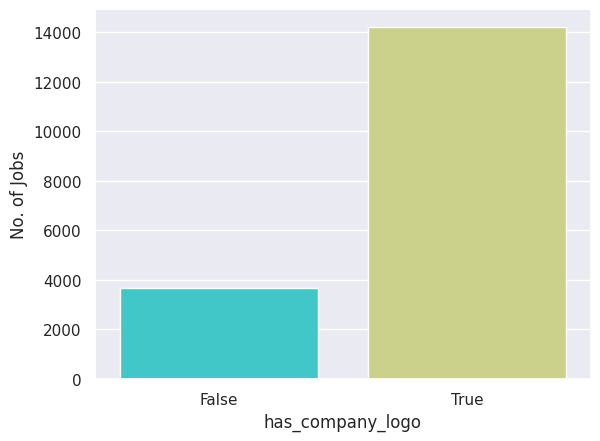

In [ ]:
ax = sb.countplot(data=jobdata, x='has_company_logo', palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.has_company_logo.value_counts()

This shows us that in the dataset, how many jobs postings has company logo as compared to job postings without company logo.

- **Logo:** 14220
- **No Logo:** 3660

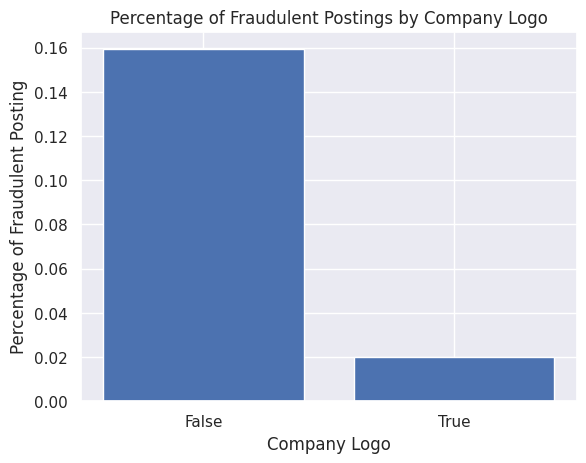

In [ ]:
# New dataframe that only consists of 'has_company_logo' and 'fraudulent'
logoNfraud = pd.DataFrame(jobdata[['has_company_logo', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})


Fraud_Logo = logoNfraud.groupby('has_company_logo').mean()['fraudulent']
plt.title('Percentage of Fraudulent Postings by Company Logo')
plt.xlabel('Company Logo')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(Fraud_Logo.index,dtype='str'), Fraud_Logo)
plt.show()

Description

### has_questions   VS   fraudulent

<ipython-input-68-63656ee107ce>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='has_questions', palette='rainbow')


has_questions
False    9088
True     8792
Name: count, dtype: int64

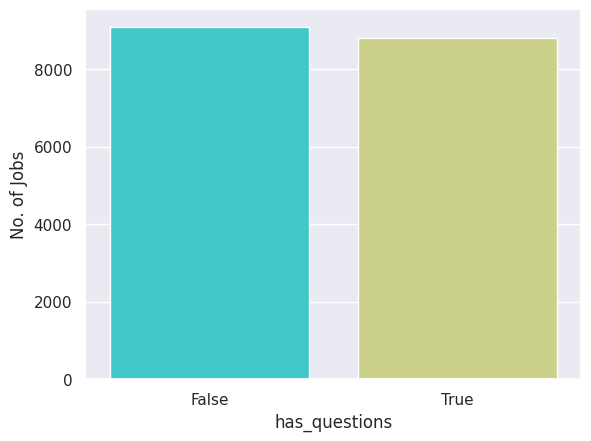

In [ ]:
ax = sb.countplot(data=jobdata, x='has_questions', palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.has_questions.value_counts()

Description

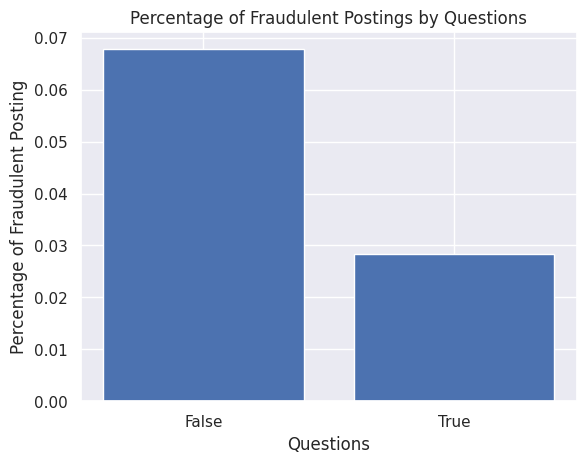

In [ ]:
# New dataframe that only consists of 'has_questions' and 'fraudulent'
questionNfraud = pd.DataFrame(jobdata[['has_questions', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})


Fraud_Question = questionNfraud.groupby('has_questions').mean()['fraudulent']
plt.title('Percentage of Fraudulent Postings by Questions')
plt.xlabel('Questions')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(Fraud_Question.index,dtype='str'), Fraud_Question)
plt.show()

Description

### employment_type   VS   fraudulent

<ipython-input-70-787a8ed885ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='employment_type', order=employment_type, palette='rainbow')


employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

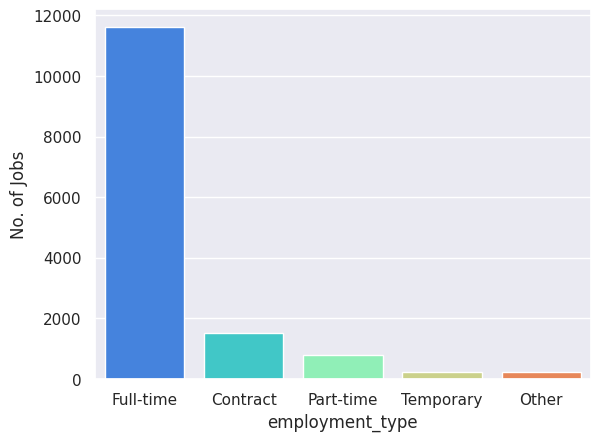

In [ ]:
employment_type = jobdata['employment_type'].value_counts().index.tolist()
ax = sb.countplot(data=jobdata, x='employment_type', order=employment_type, palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.employment_type.value_counts()

This shows how many of each employment type are there in the dataset:

- **Full-time:** 11620
- **Contract:** 1524
- **Part-time:** 797
- **Temporary:** 241
- **Other:** 227

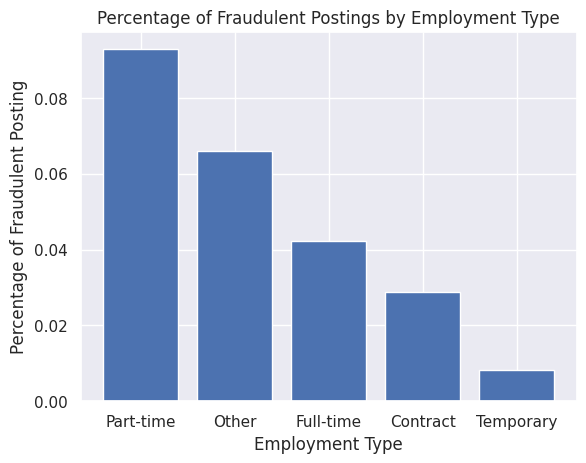

In [ ]:
# New dataframe that only consists of 'employment_type' and 'fraudulent'
employtypeNfraud = pd.DataFrame(jobdata[['employment_type', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})

Fraud_Employtype = employtypeNfraud.groupby('employment_type').mean()['fraudulent']

# Sort in descending order
Fraud_Employtype_sorted = Fraud_Employtype.sort_values(ascending=False)

plt.title('Percentage of Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(Fraud_Employtype_sorted.index,dtype='str'), Fraud_Employtype_sorted)
plt.show()

From this, we can see that part-time job postings has the highest chance of being a fraudulent job posting.

### required_experience   VS   fraudulent

<ipython-input-72-cc8ac56bc843>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='required_experience', order=required_experience, palette='rainbow')


required_experience
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: count, dtype: int64

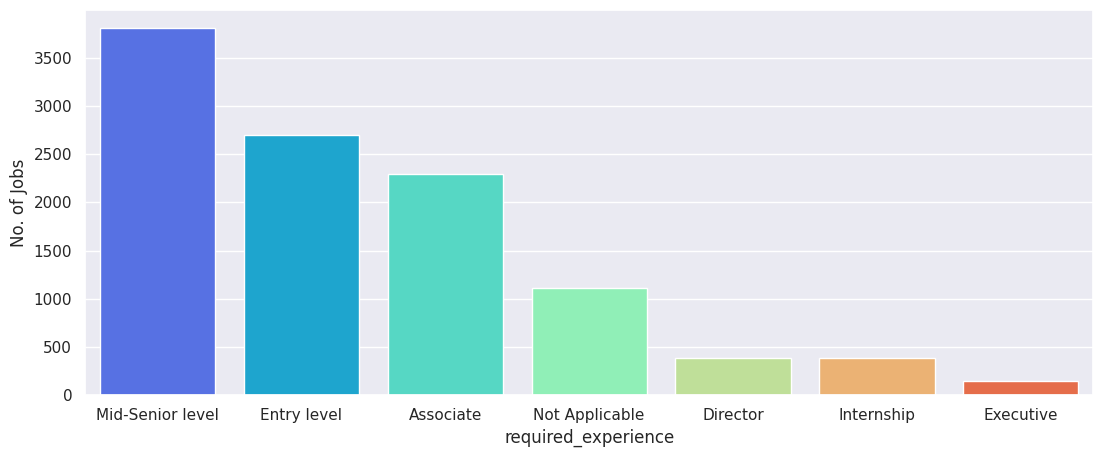

In [ ]:
plt.figure(figsize=(13,5))

required_experience = jobdata['required_experience'].value_counts().index.tolist()
ax = sb.countplot(data=jobdata, x='required_experience', order=required_experience, palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.required_experience.value_counts()

Description

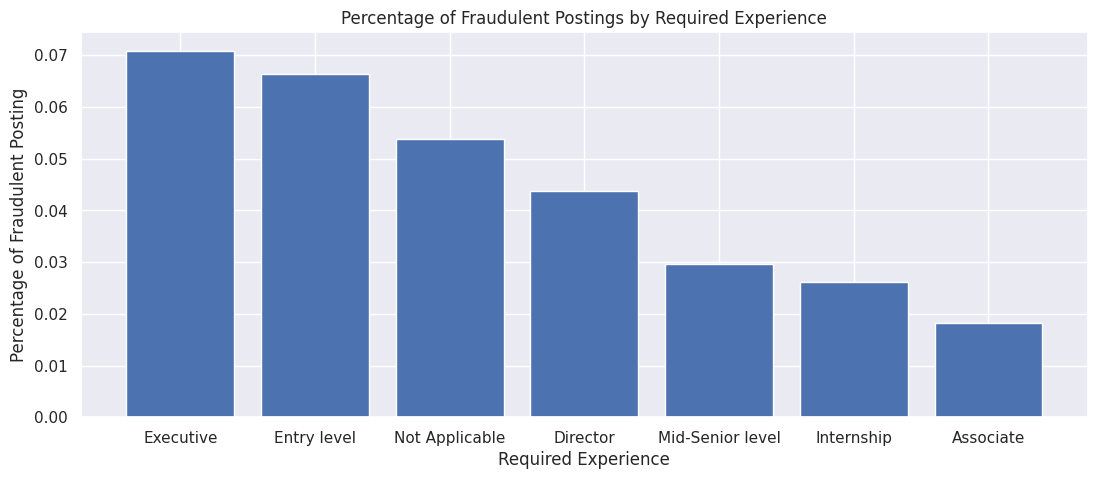

In [ ]:
# New dataframe that only consists of 'required_experience' and 'fraudulent'
reqexpNfraud = pd.DataFrame(jobdata[['required_experience', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})


Fraud_ReqExp = reqexpNfraud.groupby('required_experience').mean()['fraudulent']

# Sort in descending order
Fraud_ReqExp_sorted = Fraud_ReqExp.sort_values(ascending=False)

plt.figure(figsize=(13,5))
plt.title('Percentage of Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(Fraud_ReqExp_sorted.index,dtype='str'), Fraud_ReqExp_sorted)
plt.show()

Description

### required_education   VS   fraudulent

<ipython-input-74-33f52df585eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='required_education', order=required_education, palette='rainbow')


required_education
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: count, dtype: int64

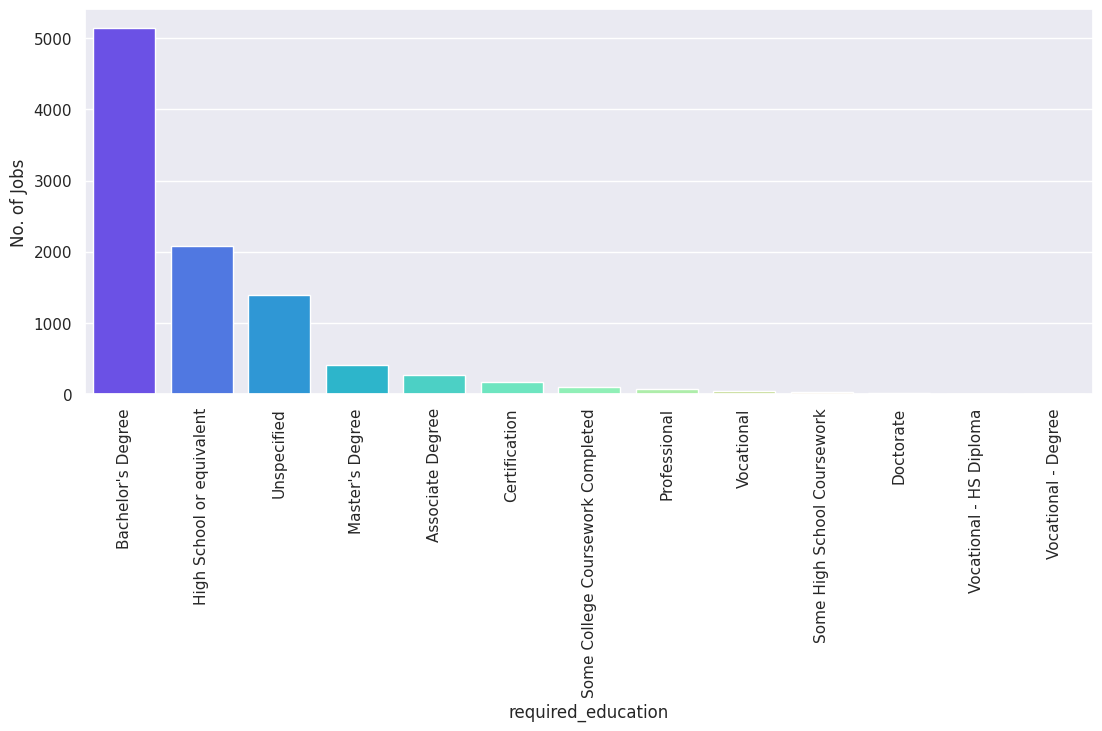

In [ ]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=90)

required_education = jobdata['required_education'].value_counts().index.tolist()
ax = sb.countplot(data=jobdata, x='required_education', order=required_education, palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.required_education.value_counts()

Description

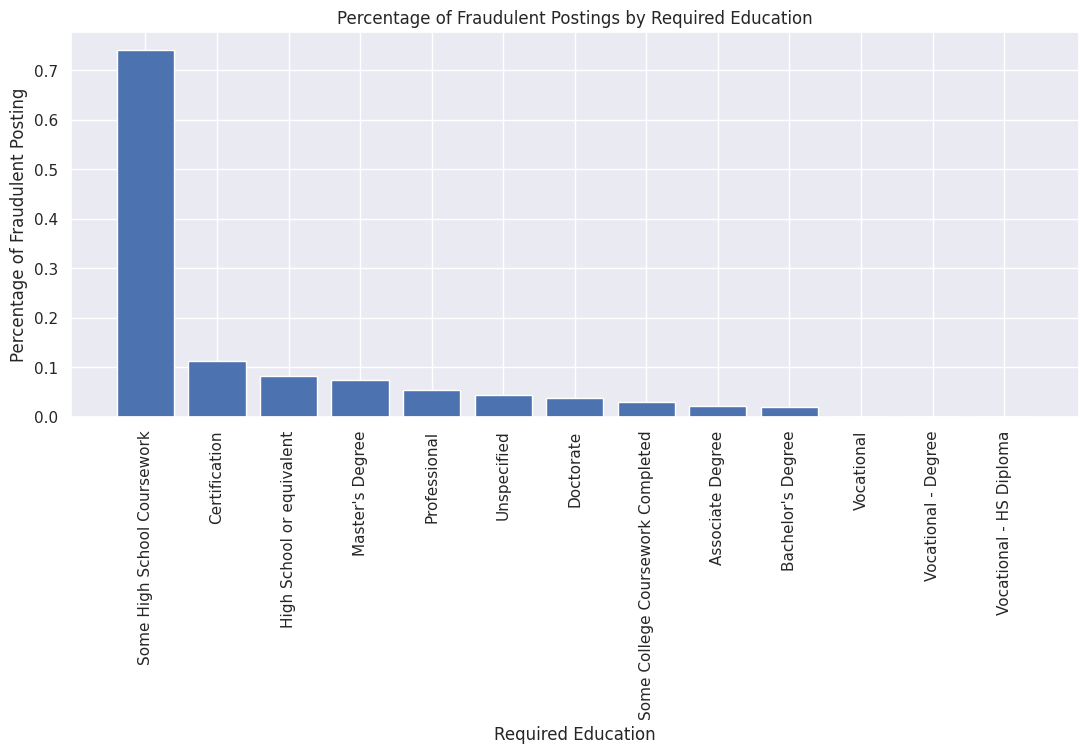

In [ ]:
# New dataframe that only consists of 'required_education' and 'fraudulent'
reqeduNfraud = pd.DataFrame(jobdata[['required_education', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})


Fraud_ReqEdu = reqeduNfraud.groupby('required_education').mean()['fraudulent']

# Sort in descending order
Fraud_ReqEdu_sorted = Fraud_ReqEdu.sort_values(ascending=False)

plt.figure(figsize=(13,5))
plt.xticks(rotation=90)
plt.title('Percentage of Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(Fraud_ReqEdu_sorted.index,dtype='str'), Fraud_ReqEdu_sorted)
plt.show()

From this, we can see that majority of the job postings that are fraudulent only require for the applicant to have some high school coursework as their required education, as compared to needing some kind of certification or any higher education.

### industry   VS   fraudulent

<ipython-input-76-2b6ffc2fcfe2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='industry', order=industry, palette='rainbow')


industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Alternative Dispute Resolution            1
Ranching                                  1
Wine and Spirits                          1
Sporting Goods                            1
Name: count, Length: 131, dtype: int64

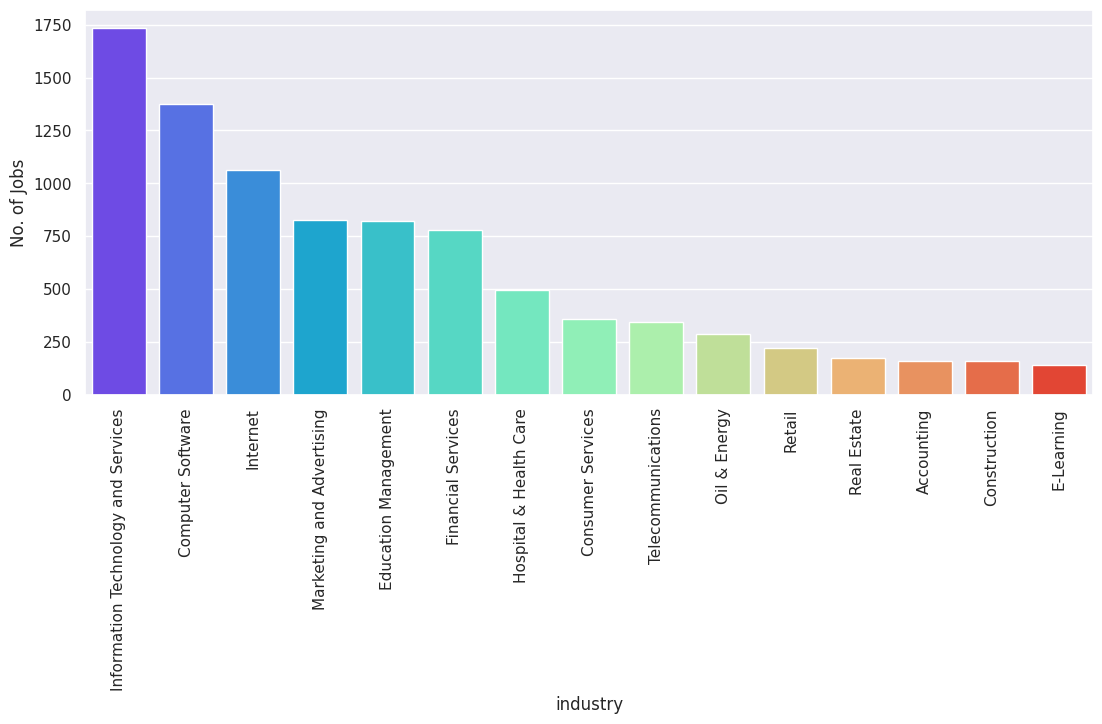

In [ ]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=90)

industry = jobdata['industry'].value_counts().nlargest(15).index.tolist()
ax = sb.countplot(data=jobdata, x='industry', order=industry, palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.industry.value_counts()

Description

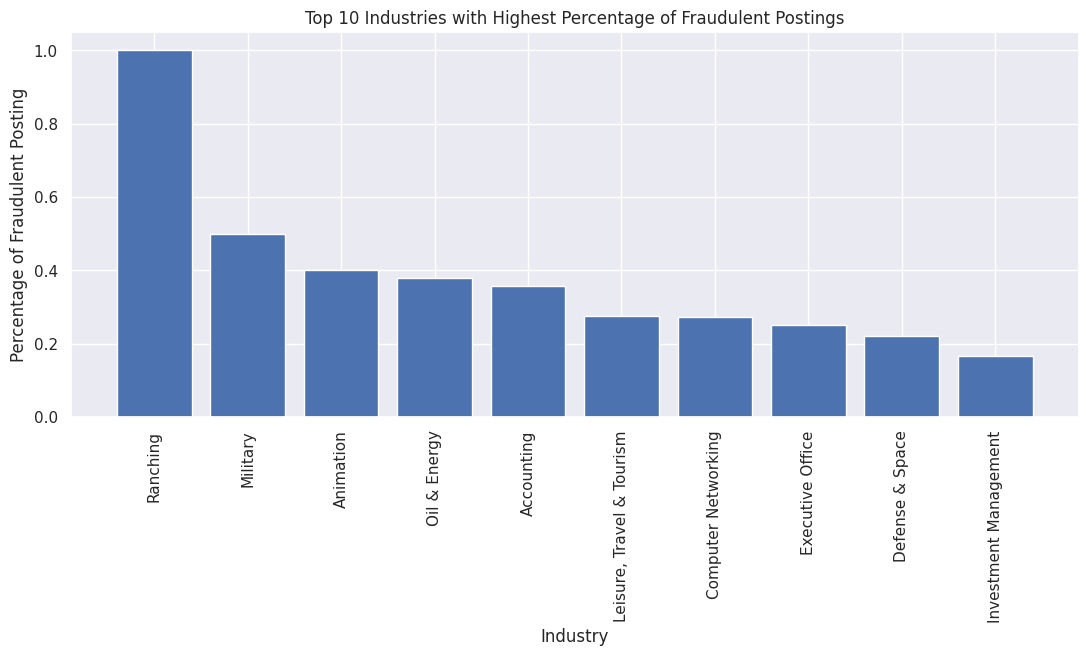

In [ ]:
# New dataframe that only consists of 'industry' and 'fraudulent'
industryNfraud = pd.DataFrame(jobdata[['industry', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})


Fraud_Industry = industryNfraud.groupby('industry').mean()['fraudulent']

# Sort in descending order
Fraud_Industry_sorted = Fraud_Industry.sort_values(ascending=False)

# Showing top 10 results
top_10 = Fraud_Industry_sorted.head(10)


plt.figure(figsize=(13,5))
plt.xticks(rotation=90)
plt.title('Top 10 Industries with Highest Percentage of Fraudulent Postings')
plt.xlabel('Industry')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(top_10.index, dtype='str'), top_10)
plt.show()

Description

### function   VS   fraudulent

<ipython-input-78-366d01b30398>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='function', order=function, palette='rainbow')


function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Art/Creative               132
Writing/Editing            132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38

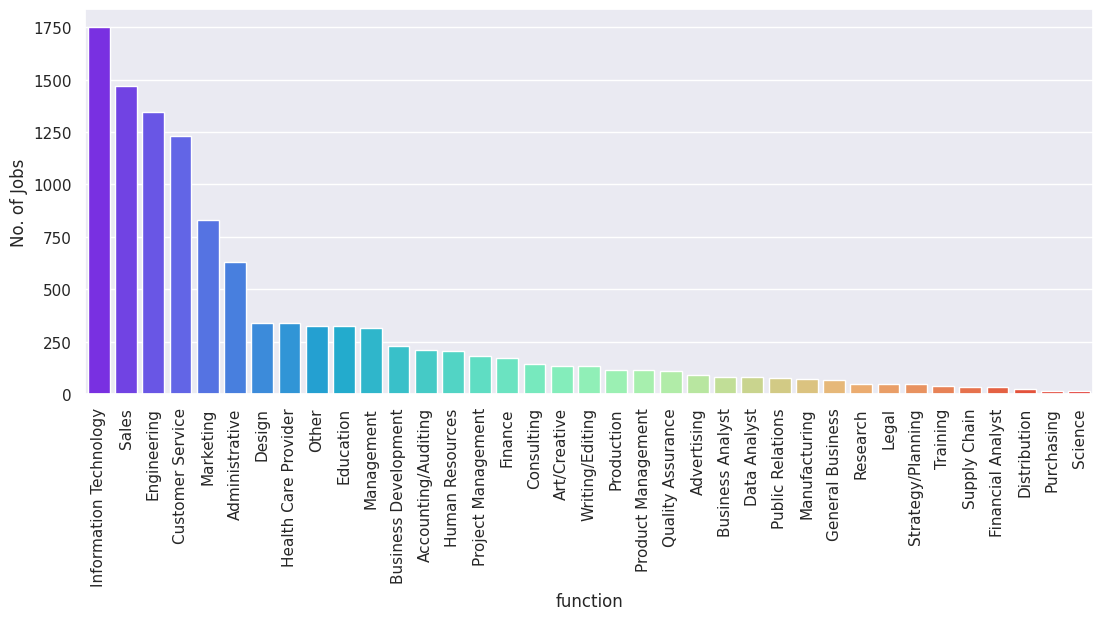

In [ ]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=90)

function = jobdata['function'].value_counts().index.tolist()
ax = sb.countplot(data=jobdata, x='function', order=function, palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.function.value_counts()

Description

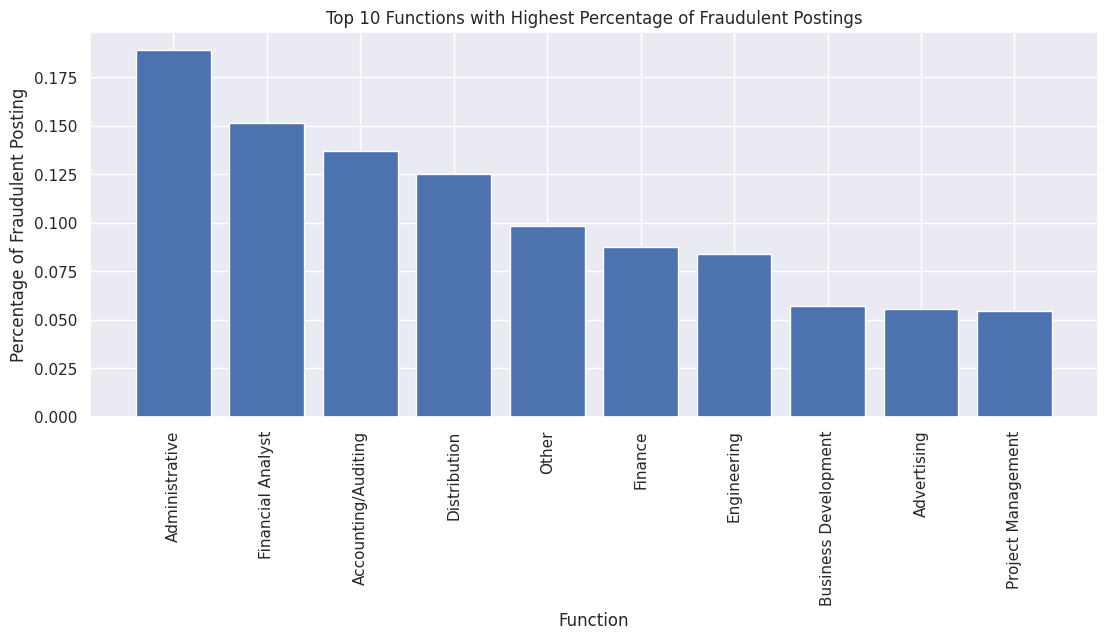

In [ ]:
# New dataframe that only consists of 'function' and 'fraudulent'
funcNfraud = pd.DataFrame(jobdata[['function', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})


Fraud_Func = funcNfraud.groupby('function').mean()['fraudulent']

# Sort in descending order
Fraud_Func_sorted = Fraud_Func.sort_values(ascending=False)

# Showing top 10 results
top_10 = Fraud_Func_sorted.head(10)


plt.figure(figsize=(13,5))
plt.xticks(rotation=90)
plt.title('Top 10 Functions with Highest Percentage of Fraudulent Postings')
plt.xlabel('Function')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(top_10.index, dtype='str'), top_10)
plt.show()

Description

### country   VS   fraudulent

<ipython-input-80-bfad763a6d5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(data=jobdata, x='country', order=country, palette='rainbow')


country
US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
UG        1
CM        1
KZ        1
SD        1
PE        1
Name: count, Length: 90, dtype: int64

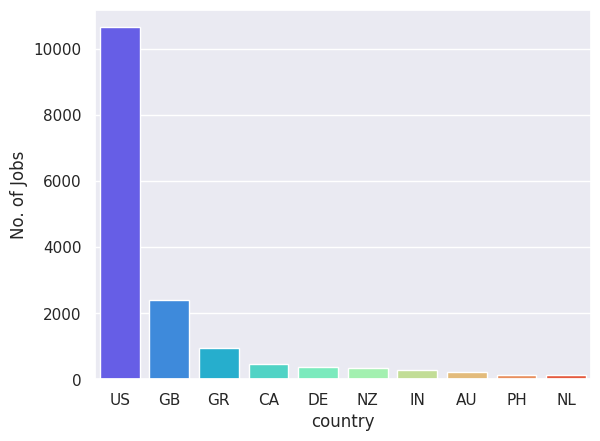

In [ ]:
country = jobdata['country'].value_counts().nlargest(10).index.tolist()
ax = sb.countplot(data=jobdata, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')
jobdata.country.value_counts()

Description

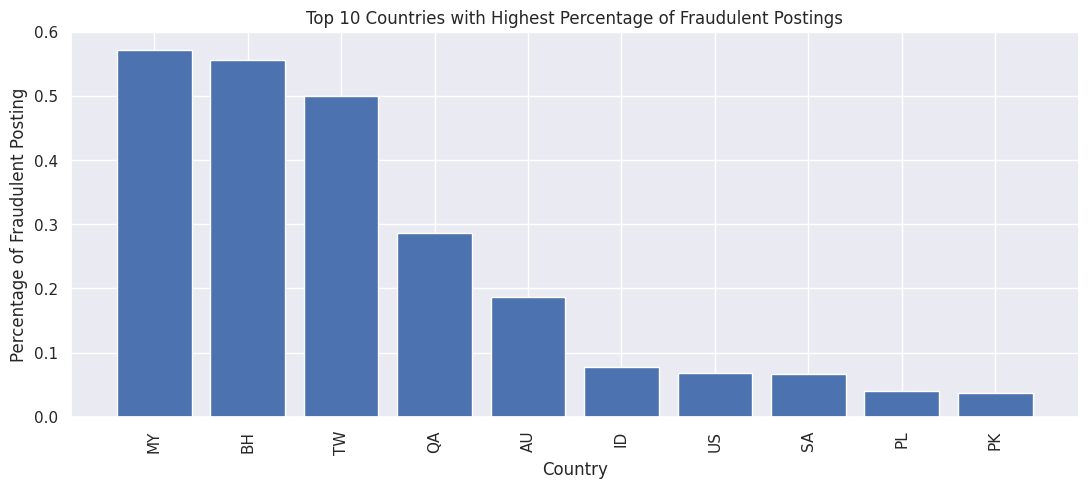

In [ ]:
# New dataframe that only consists of 'country' and 'fraudulent'
countryNfraud = pd.DataFrame(jobdata[['country', 'fraudulent']])

# As we will need the variable 'fraudulent' in its mean form, we convert it back to numeric temporarily in this new dataframe
jobdata = jobdata.astype({'fraudulent': int})


Fraud_Country = countryNfraud.groupby('country').mean()['fraudulent']

# Sort in descending order
Fraud_Country_sorted = Fraud_Country.sort_values(ascending=False)

# Showing top 10 results
top_10 = Fraud_Country_sorted.head(10)


plt.figure(figsize=(13,5))
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Highest Percentage of Fraudulent Postings')
plt.xlabel('Country')
plt.ylabel('Percentage of Fraudulent Posting')
plt.bar(np.array(top_10.index, dtype='str'), top_10)
plt.show()

## Conclusion on Boolean & Categorical variables


**Useful:**
- telecommuting
- has_company_logo
- has_questions
- employment_type
- required_education
- country


**Not useful:**
- required_experience
- Industry
- Function

In [ ]:
# Create new dataframe with all the text combined into one column and add the fraudulent column
text_data = pd.DataFrame()
text_data['text'] = jobdata['title'] + ' ' + jobdata['company_profile'] + ' ' + jobdata['description'] + ' ' + jobdata['requirements']
text_data = text_data.join(jobdata['fraudulent'])

#Removing NaN values
text_data.fillna(' ', inplace=True)

text_data.head()

,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


In [ ]:
#Seperate fraud and real job postings
fraud = text_data[text_data.fraudulent==True].text
real = text_data[text_data.fraudulent==False].text

In [ ]:
Stopwords = spacy.lang.en.stop_words.STOP_WORDS

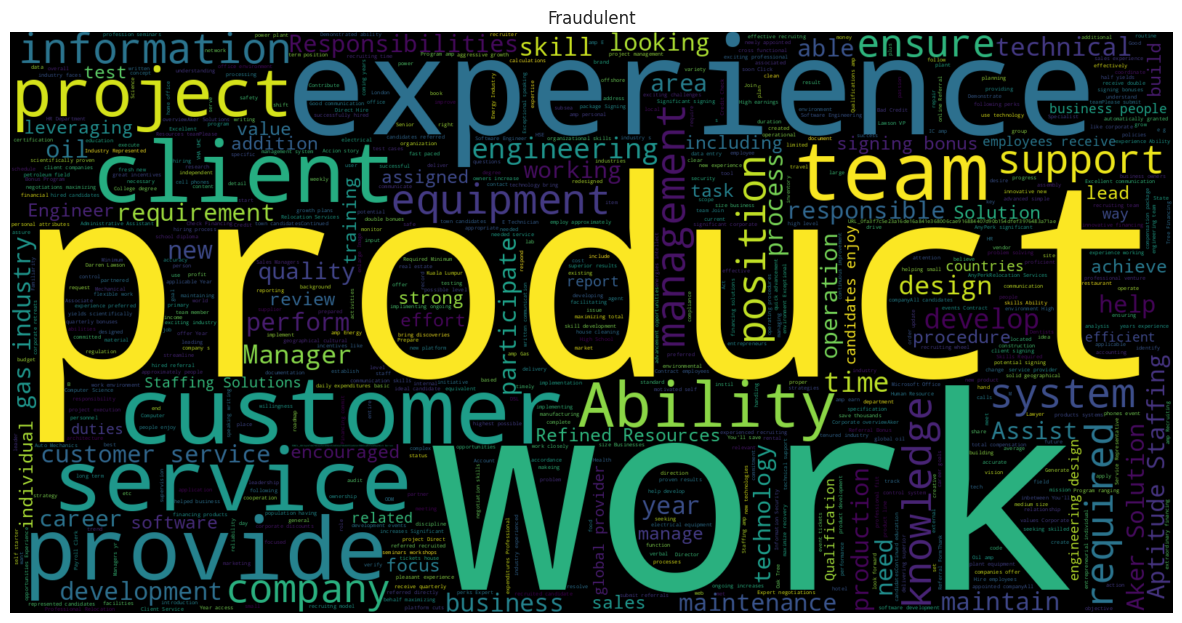

In [ ]:
# Generate Word cloud for fraud job posting texts
plt.figure(figsize = (15,15))
word_cloud = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = Stopwords).generate(str(" ".join(fraud)))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Fraudulent')
plt.show()

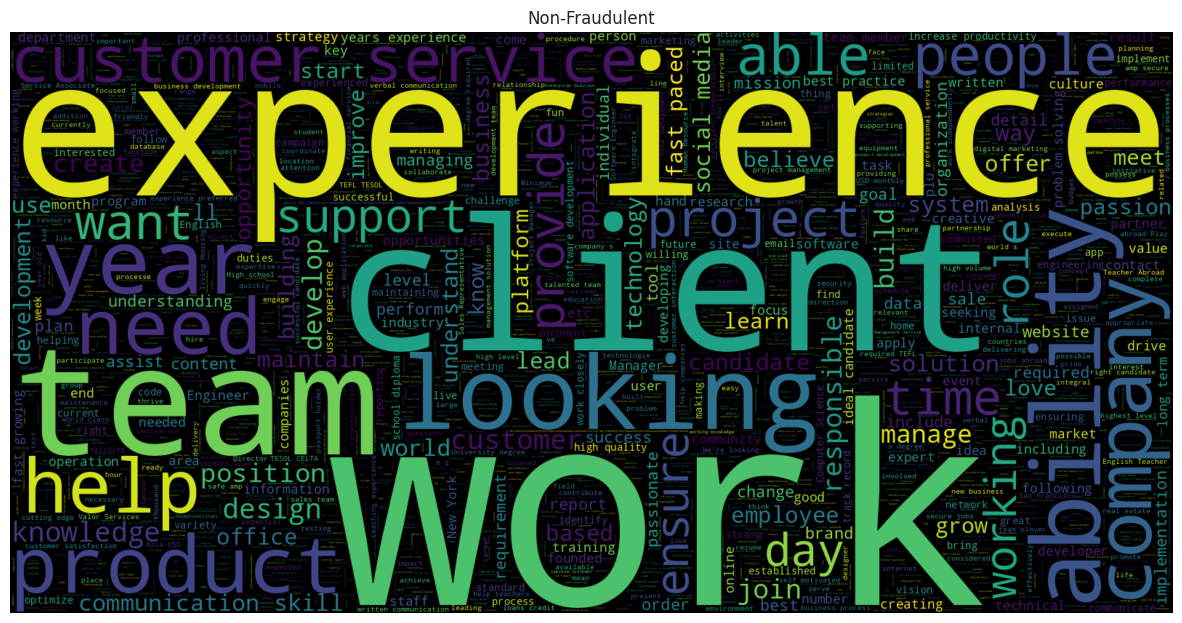

In [ ]:
# Generate Word cloud for real job posting texts
plt.figure(figsize = (15,15))
word_cloud = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = Stopwords).generate(str(" ".join(real)))
plt.imshow(word_cloud,interpolation = 'bilinear')
plt.axis("off")
plt.title('Non-Fraudulent')
plt.show()